<a href="https://colab.research.google.com/github/monsieurshiva/AdvancedDeepLearning/blob/main/CustomLayer/Creating_a_Custom_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding a Wide and Deep Model

We will implement a wide and deep model. We'll first look at how to build it with the Functional API and then encapsulate this into a class.

## Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model

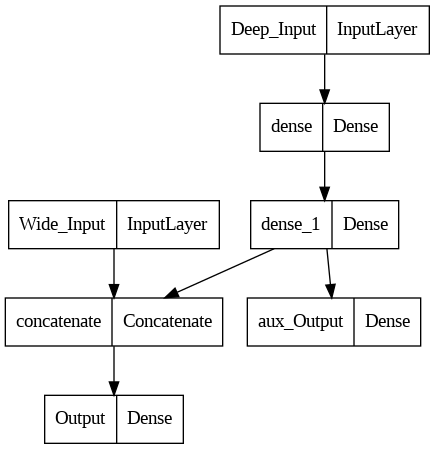

In [2]:
# define inputs
input_a = Input(shape=[1], name="Wide_Input")
input_b = Input(shape=[1], name="Deep_Input")

# define deep path
hidden_1 = Dense(30, activation="relu")(input_b)
hidden_2 = Dense(30, activation="relu")(hidden_1)

# define merged path
concat = concatenate([input_a, hidden_2])
output = Dense(1, name="Output")(concat)

# define another output for the deep path
aux_output = Dense(1,name="aux_Output")(hidden_2)

# build the model
model = Model(inputs=[input_a, input_b], outputs=[output, aux_output])

# visualize the architecture
plot_model(model)

## Implement as a Class

Alternatively, you can also implement this same model as a class. 
- For that, you define a class that inherits from the [Model](https://keras.io/api/models/model/) class.
- Inheriting from the existing `Model` class lets you use the Model methods such as `compile()`, `fit()`, `evaluate()`. 

When inheriting from `Model`, you will want to define at least two functions:
- `__init__()`: you will initialize the instance attributes.
- `call()`: you will build the network and return the output layers.

If you compare the two methods, the structure is very similar, except when using the class, you'll define all the layers in one function, `init`, and connect the layers together in another function, `call`.

In [3]:
# inherit from the Model base class
class WideAndDeepModel(Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        '''initializes the instance attributes'''
        super().__init__(**kwargs)
        self.hidden1 = Dense(units, activation=activation)
        self.hidden2 = Dense(units, activation=activation)
        self.main_output = Dense(1)
        self.aux_output = Dense(1)

    def call(self, inputs):
        '''defines the network architecture'''
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output


In [4]:
# create an instance of the model
model = WideAndDeepModel()
model